In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import xgboost as xgb
from functools import partial
from sklearn.metrics import confusion_matrix, roc_curve, auc
import json
import pickle
from functools import partial
from sklearn.metrics import mean_squared_error
import hiplot

data_dir = "../../data/unziped_data/"

In [14]:
#Open data with pickle
data_for_training = "../../data/Data_For_Training/"
with open(data_for_training+"icfes_20141.p", "rb") as f:
    data = pickle.load(f)
    
#lista de las columnas con las caracteristicas a predecir
labels_names = ["PUNT_MATEMATICAS", "PUNT_CIENCIAS_SOCIALES", "PUNT_INGLES",
"PUNT_BIOLOGIA", "PUNT_FILOSOFIA", "PUNT_FISICA", "PUNT_QUIMICA", "PUNT_LENGUAJE","ESTU_PUESTO"]

#lista de las columnas que se van a omitir de las caracteristicas
vars_2_omit = ["PUNT_MATEMATICAS", "PUNT_CIENCIAS_SOCIALES", "PUNT_INGLES",
"PUNT_BIOLOGIA", "PUNT_FILOSOFIA", "PUNT_FISICA", "PUNT_QUIMICA", "PUNT_LENGUAJE", "RECAF_PUNT_SOCIALES_CIUDADANAS",
 "RECAF_PUNT_INGLES", "RECAF_PUNT_LECTURA_CRITICA", "RECAF_PUNT_MATEMATICAS", "RECAF_PUNT_C_NATURALES", "ESTU_PUESTO", 
"PUNT_PROFUNDIZA_MATEMATICA", "PUNT_PROFUNDIZA_LENGUAJE", "PUNT_PROFUNDIZA_BIOLOGIA", "PUNT_PROFUNDIZA_CSOCIALES",
"PUNT_INTERDISC_VIOLENCIAYSOC", "PUNT_INTERDISC_MEDIOAMBIENTE","DESEMP_INGLES","DESEMP_PROFUNDIZA_LENGUAJE",
"DESEMP_PROFUNDIZA_MATEMATICA","DESEMP_PROFUNDIZA_BIOLOGIA", "DESEMP_PROFUNDIZA_CSOCIALES"]


labels = data[labels_names]
features = data.drop(vars_2_omit,axis=1)

#train/test split
features_train, features_test, labels_train, labels_test= train_test_split(features, labels, test_size=0.2, random_state=42)

#Scaling the features and the labels

#Loading the scaler
#scaler_features = load(open('scaler_features_20141.pkl', 'rb'))
#scaler_labels = load(open('scaler_labels_20141.pkl', 'rb'))

scaler_features = StandardScaler()
scaler_features.fit(features_train)

X_train = scaler_features.transform(features_train)
X_test = scaler_features.transform(features_test)

scaler_labels = StandardScaler()
scaler_labels.fit(labels_train)

Y_train = scaler_labels.transform(labels_train)
Y_test = scaler_labels.transform(labels_test)

In [15]:
bst = xgb.Booster({'nthread': 4})  # init model
bst.load_model('models/icfes_20141_ESTU_PUESTO.model')  # load data

In [21]:
# make predictions for test data
dtest = xgb.DMatrix(X_test,label=Y_test[:,8])
dtrain = xgb.DMatrix(X_train,label=Y_train[:,8])
preds_test = bst.predict(dtest)

In [35]:
puesto = bst.get_score(importance_type="total_gain")

dict_1 = {features.columns[int(k.replace("f",""))]: v for k, v in sorted(puesto.items(), key=lambda item: item[1])}

print(dict_1)

{'ESTU_RAZONRETIROCOLEGIO_Por enfermedad': 0.606241286, 'ESTU_RAZONRETIROCOLEGIO_Por falta de cupo': 0.656702042, 'ESTU_DEPTO_RESIDE_CAQUETA': 0.881168425, 'ESTU_PROGRAMADESEADO_Militares': 1.03481233, 'COLE_JORNADA_TARDE': 550.3104259529997, 'COLE_DEPTO_UBICACION_ARAUCA': 1.28378379, 'ESTU_PROGRAMADESEADO_Veterinaria': 5.07765996, 'COLE_DEPTO_UBICACION_NORTE SANTANDER': 6.17646575, 'COLE_DEPTO_UBICACION_CAQUETA': 6.838195503, 'COLE_DEPTO_UBICACION_PUTUMAYO': 7.220335005000001, 'ESTU_RAZONRETIROCOLEGIO_Por falta de colegio cerca de la casa': 7.2901643499999995, 'ESTU_TIPOCARRERADESEADA_Ninguna': 7.69979477, 'COLE_DEPTO_UBICACION_QUINDIO': 8.83190309, 'ESTU_RAZONRETIROCOLEGIO_Por falta de interés en estudiar': 12.47088266, 'COLE_DEPTO_UBICACION_SUCRE': 12.504517439999999, 'COLE_DEPTO_UBICACION_CORDOBA': 13.381540300000003, 'ESTU_RAZONRETIROCOLEGIO_Por dificultades en el colegio con compañeros': 13.780928247999999, 'COLE_DEPTO_UBICACION_GUAINIA': 14.16771674, 'ESTU_PRIVADO_LIBERTAD': 14.

In [38]:
df = pd.read_csv(os.path.join(data_dir, "FTP_SABER11_20141.TXT"), delimiter='¬')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [51]:
records = df[['FAMI_NIVELSISBEN', 'ESTU_PUESTO', 'FAMI_TIENEINTERNET']][:5000].to_dict(orient='records')


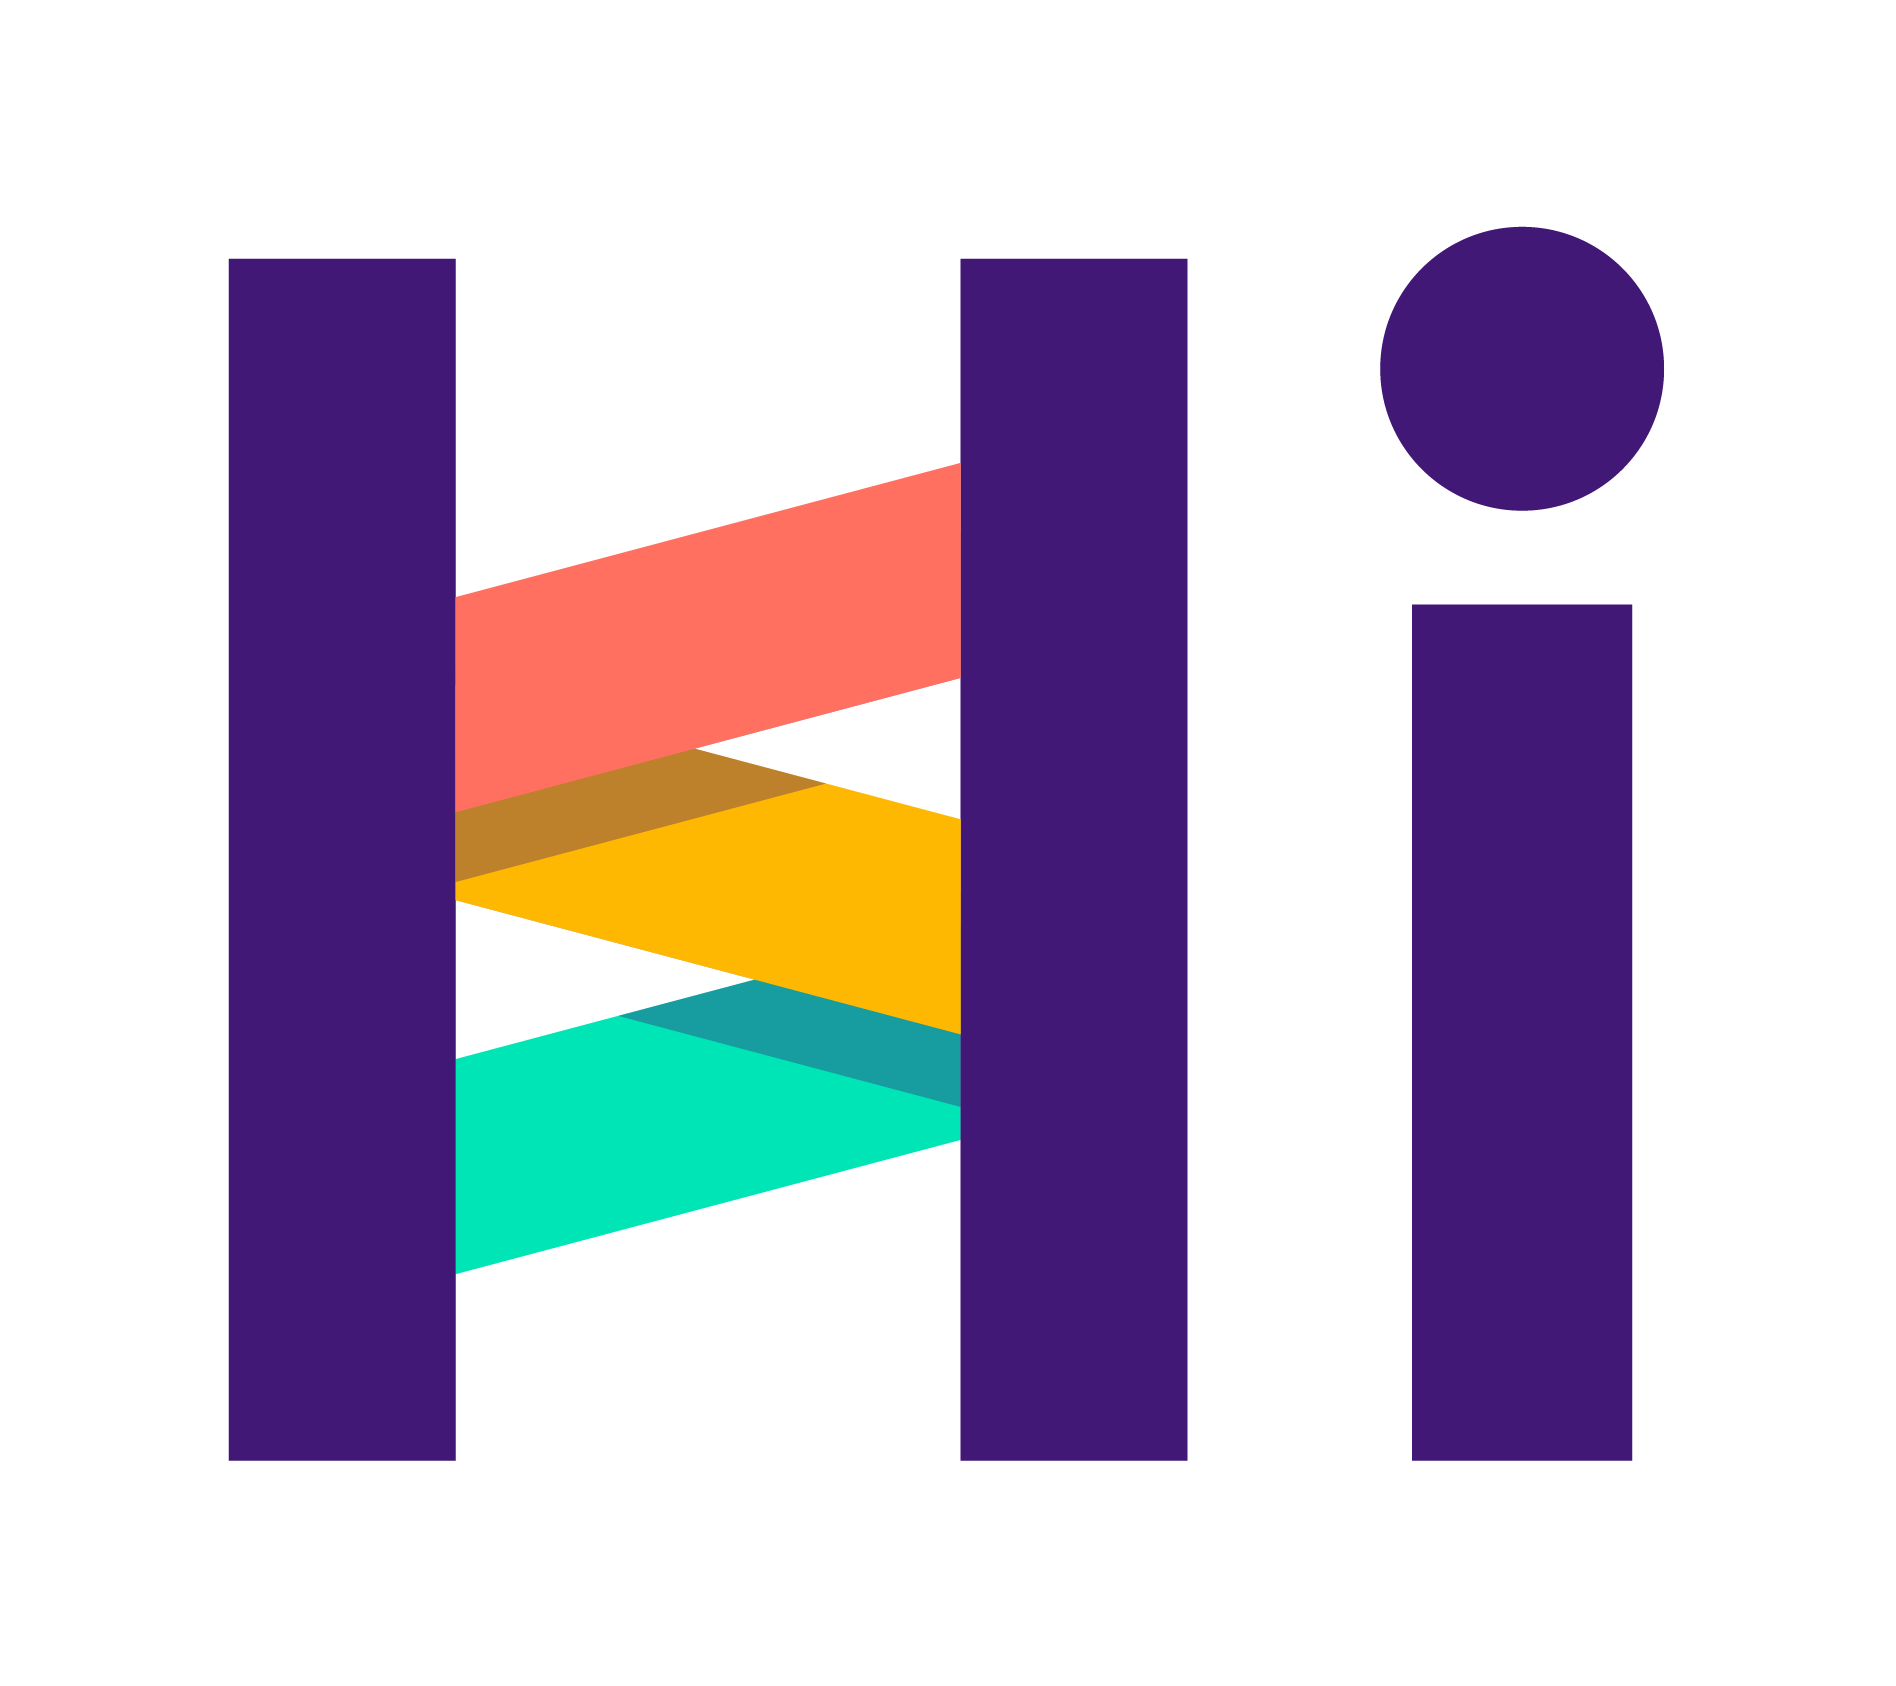

In [52]:
hiplot.Experiment.from_iterable(records).display()